In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import statsmodels.api as sm
import xgboost as xgb
import seaborn as sns
import holidays
import pickle
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler


## 0 - Cargar de datos y revisión General

- Revisar primeras y ultimas filas del dataframe.
- Cuantas filas/columnas componen el df.
- Revisar el tipo de varaibles.
- Revisar columnas con valores - Revisar las filas/columnas duplicadas. No queremos redundancia ni tampoco tener la misma instancia en el conjunto de entrenamiento y test.
- Describe y revisar que los valores tengan sentido.


In [2]:
# 0.0 - Cargamos el dataframe
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)  
df.to_csv("/workspaces/Jacinto-Proyecto-procesamiento-datos/AB_NYC_2019_temp.csv", index=False)

In [4]:
# 0.1 - Revisamos las primeras filas del dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
# 0.2 - Revisamos las ultimas filas del dataframe
df.tail() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [38]:
# 0.3 - Vemos las dimensiones en filas y columnas del dataframe
df.shape

(48895, 16)

In [39]:
# 0.4 Vemos un resumen detallado del dataframe para conocer el tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [40]:
# 0.5 - Observamos los valores unicos de cada columna del df
n_unicos = df.nunique()
n_unicos

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [41]:
# 0.6 - Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
df = df.drop(columns=cols_constantes)

print(f"Columnas eliminadas: {list(cols_constantes)}")

Columnas eliminadas: []


No existen columnas con valores constantes

In [42]:
# 0.7 - Comprobar la presencia de filas duplicadas
df.duplicated().sum()

np.int64(0)

In [43]:
# 0.8 - Cambiamos filas por columnas y vemos si hay valores duplicados
df.T.duplicated(keep=False)

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

No existen celdas duplicadas

## 1.Distribución de las variables y relación entre variables.

Además de histogramas, boxplots y scatterplots considerar diferentes técnicas de codificación de variables categóricas (one-hot encoding, target encoding, frecuency encoding, label encoder...).

1.1 - Estudiamos la variable precio creando graficas.

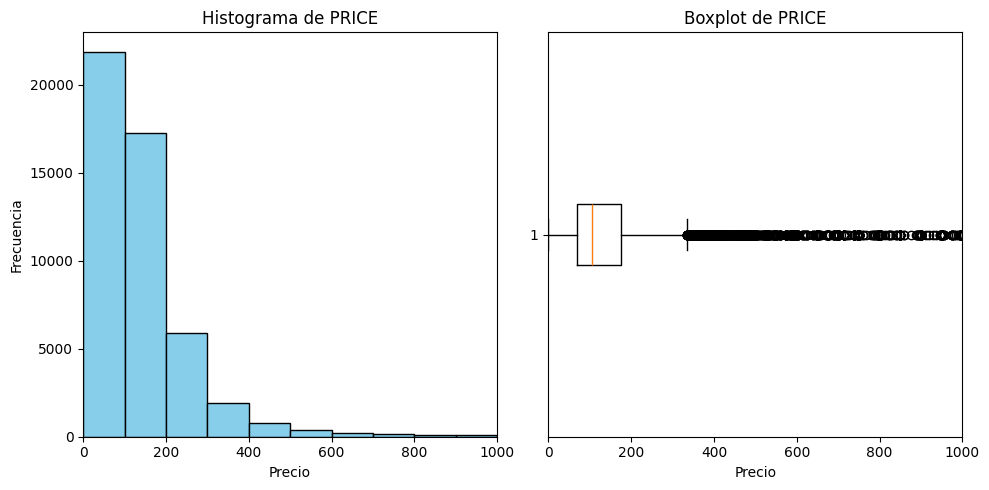

In [44]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=100, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlim(0, 1000)  # Fijamos el límite máximo en el eje X

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')
ax[1].set_xlim(0, 1000)  # Fijamos el límite máximo en el eje X

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

EXPLICACIÓN DE LAS GRÁFICAS:

1-Histograma de price

La mayoría de los valores se concentran en el extremo izquierdo del gráfico, lo que sugiere una alta cantidad de alojamientos con precios bajos.

Si observamos una cola larga hacia la derecha, esto indica la presencia de alojamientos de lujo con precios muy elevados.

La asimetría en la distribución podría indicar una distribución sesgada, lo que podría afectar modelos de regresión o análisis estadísticos.

2-Boxplot de PRICE

La línea dentro de la caja representa la mediana, que es el precio medio de los alojamientos.

Los bordes de la caja indican el rango intercuartil (percentiles 25 y 75), mostrando la mayoría de los precios típicos.

Los puntos fuera de los bigotes son alojamientos con precios significativamente más altos que la mayoría.

Si el boxplot tiene bigotes muy extendidos, indica que hay una amplia variabilidad en los precios.

1.2 - Creamos la columna LOG_PRICE, que representa el precio (price) transformado con una función logarítmica. La razón principal para hacer esto es reducir la influencia de valores extremos y hacer que la distribución de precios sea más manejable para la regresión y otros análisis estadísticos.

In [45]:
df['log_price'] = np.where(df['price'] > 0, np.log(df['price']), 0)

/home/vscode/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- Hacemos 2 graficas (Histograma y boxplot) de log_price para verificar si la distribución es más simetrica.

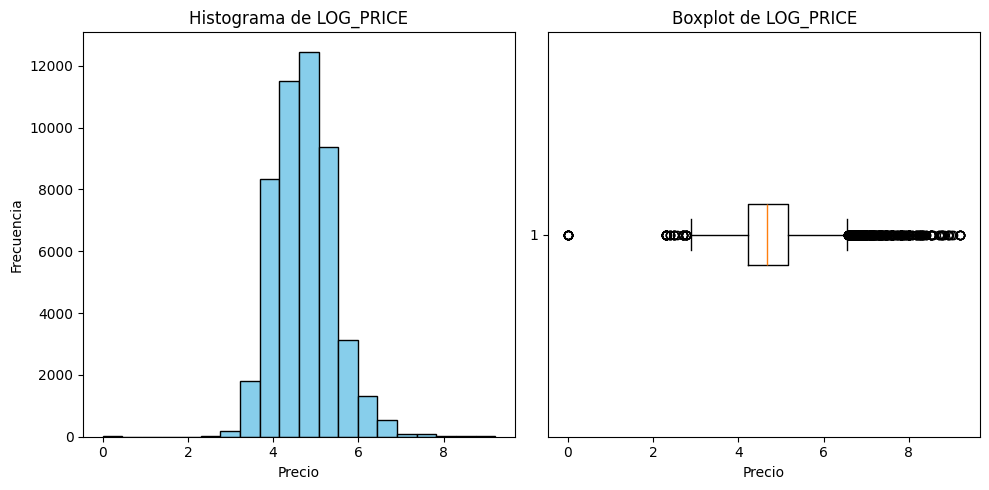

In [46]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['log_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de LOG_PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('Boxplot de LOG_PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

EXPLICACIÓN DE LAS GRÁFICAS:

1-Histograma de log_price
Este gráfico muestra la distribución de los precios de los alojamientos. Observaciones clave:

- La mayoría de los precios están concentrados en un rango bajo, lo que indica que hay muchos alojamientos económicos.

- Hay un sesgo a la derecha (valores altos en el extremo derecho), lo que sugiere que existen algunos alojamientos con precios excepcionalmente elevados.

- La cantidad de bins (bins=100) da una alta resolución en la visualización, ayudando a ver mejor la concentración de los valores.

2-Boxplot de log_price
El boxplot representa la dispersión y presencia de valores atípicos:

- La caja central muestra el rango intercuartílico (Q1-Q3) de los precios.

- La línea dentro de la caja representa la mediana.

- Valores atípicos: Se observan puntos fuera de los "bigotes", indicando que hay precios significativamente más altos que la mayoría.

1.3 - Codificamos las variables categoricas 'room_type' y 'neighbourhood_group' mediante Label Encoding. Este método crea columnas binarias (0 o 1) para cada categoría dentro de una variable.

In [47]:
# Codificadores almacenados en variables
le_room = LabelEncoder()
le_neigh = LabelEncoder()

#Creamos nuevas columnas para los valores codificados
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])
df['neighbourhood_group_encoded'] = le_neigh.fit_transform(df['neighbourhood_group'])

# Guardar los codificadores en un diccionario en memoria
encoders = {
    'room_type': le_room,
    'neighbourhood_group': le_neigh
}

1.4 - Representamos graficamente la relacion entre las variables categorizadas.

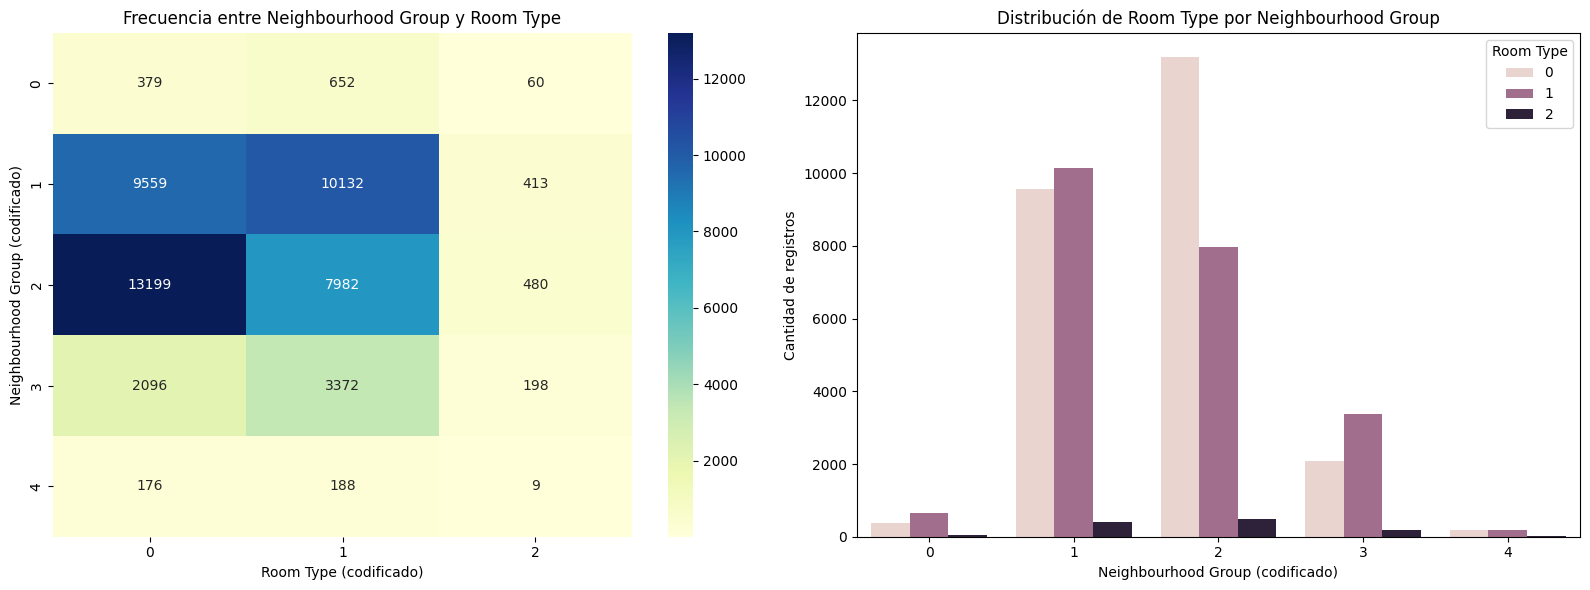

In [48]:
# Crear la tabla cruzada
cross_tab = pd.crosstab(df['neighbourhood_group_encoded'], df['room_type_encoded'])

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Mapa de calor
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', ax=ax1)
ax1.set_title('Frecuencia entre Neighbourhood Group y Room Type')
ax1.set_xlabel('Room Type (codificado)')
ax1.set_ylabel('Neighbourhood Group (codificado)')

# Gráfico 2: Conteo con hue
sns.countplot(data=df, x='neighbourhood_group_encoded', hue='room_type_encoded', ax=ax2)
ax2.set_title('Distribución de Room Type por Neighbourhood Group')
ax2.set_xlabel('Neighbourhood Group (codificado)')
ax2.set_ylabel('Cantidad de registros')
ax2.legend(title='Room Type')

plt.tight_layout()
plt.show()

## 2.Valores faltantes e imputación
- Revisar porcentaje de valores faltantes por columna así como filas.

- Gráficas que muestren patrones en los datos faltantes.

- Imputar en caso necesario (KnnImputer, most common, media, mediana...).




2.1 - Revisar valores faltantes.
Antes de imputar, es fundamental conocer la cantidad de valores faltantes en nuestro dataset.

In [49]:
# Ver porcentaje de valores faltantes por columna
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

# Ver porcentaje de filas con valores faltantes
missing_rows = df.isnull().sum(axis=1)
print(f"Porcentaje de filas con al menos un valor faltante: {missing_rows.value_counts(normalize=True) * 100}")

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
log_price                          0.000000
room_type_encoded                  0.000000
neighbourhood_group_encoded        0.000000
dtype: float64
Porcentaje de filas con al menos un valor faltante: 0    79.396666
2    20.527661
1     0.044994
3     0.030678
Name: proportion, dtype: float64


In [50]:
#Calculamos el porcentaje de lineas que tienen al menos un valor nulo
df.isnull().any(axis=1).sum()/len(df)*100

np.float64(20.603333674199817)

2.2 - Visualizar patrones en los datos faltantes.
Podemos usar missingno para ver si hay patrones claros en la distribución de los valores faltantes:

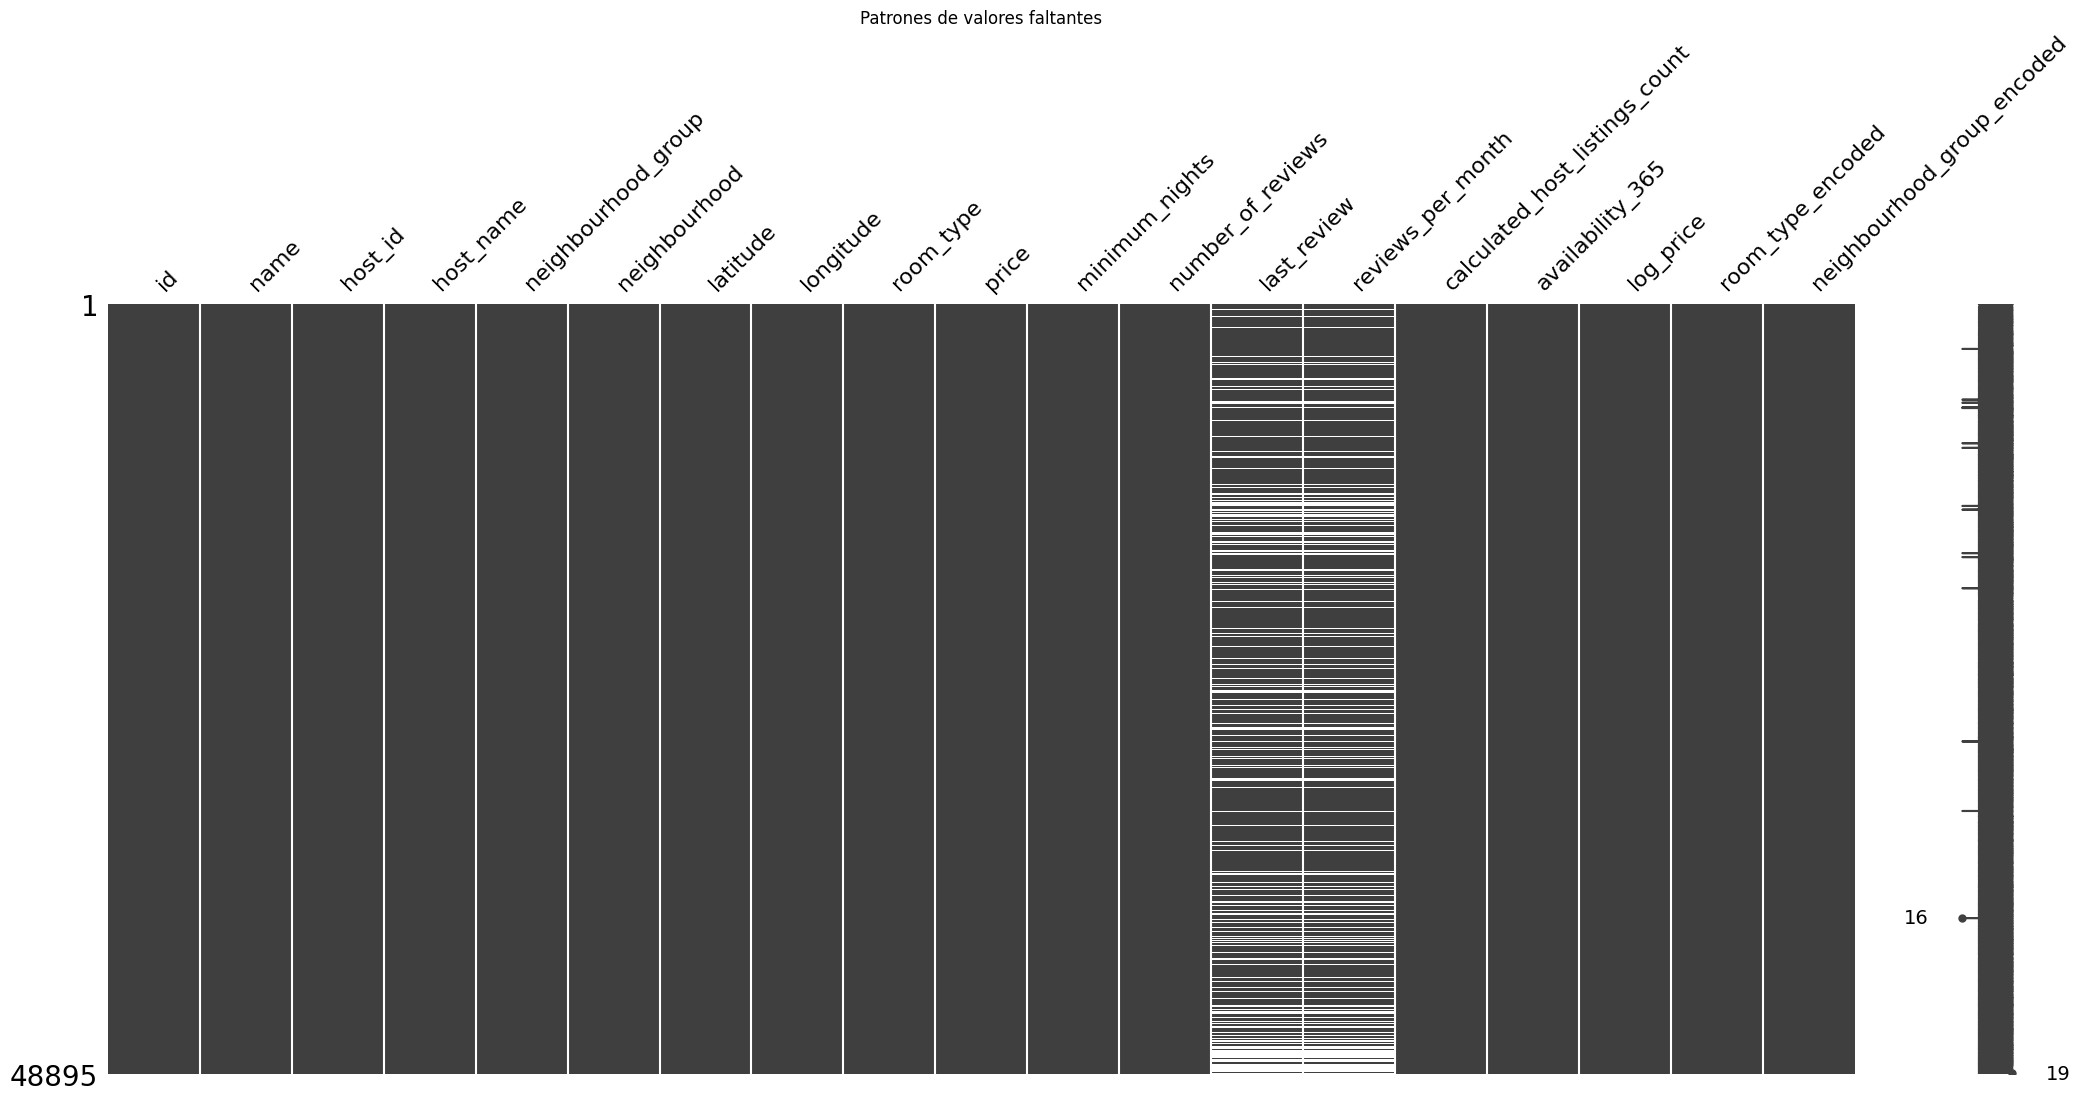

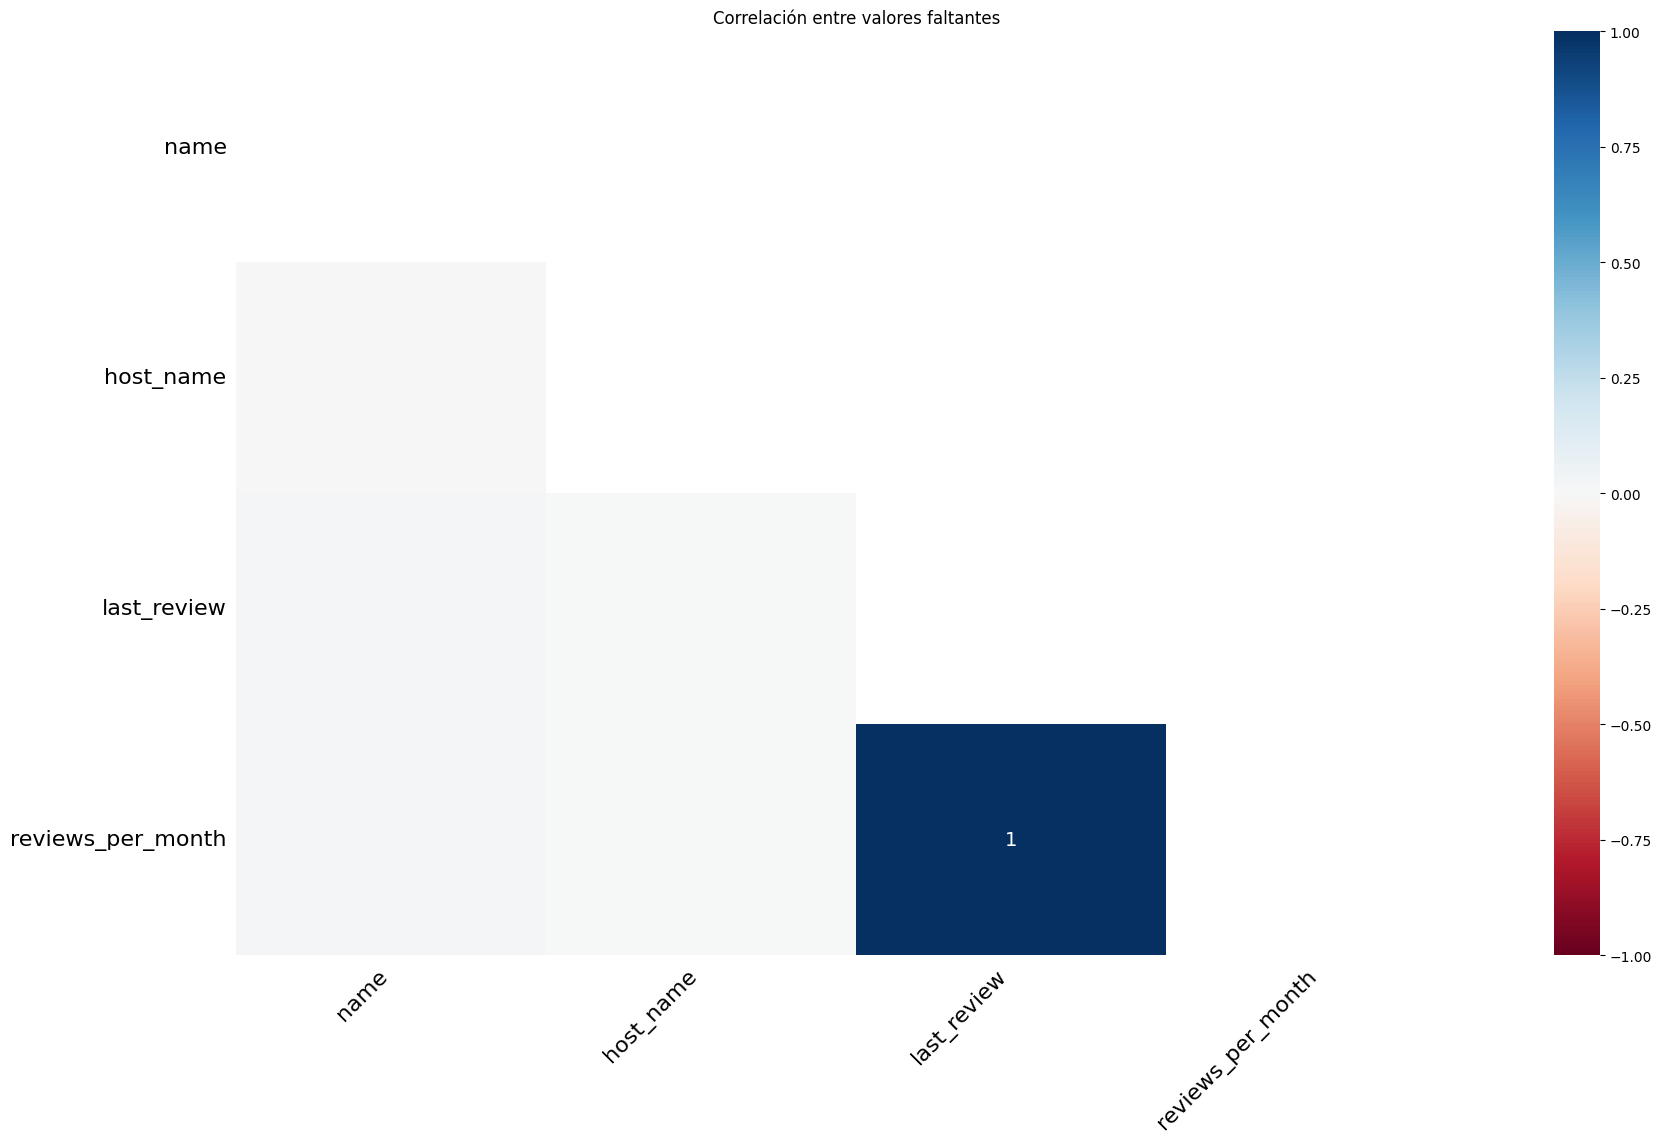

In [51]:
# Mapa de valores faltantes
msno.matrix(df)  # Visualización de valores nulos
plt.title("Patrones de valores faltantes")
plt.show()

# Mapa de correlaciones entre valores faltantes
msno.heatmap(df)  # Relación entre valores nulos
plt.title("Correlación entre valores faltantes")
plt.show()

Interpretación de los gráficos:

Mapa de valores faltantes (matrix): Nos dice qué partes del dataset tienen valores nulos y si hay patrones claros de pérdida de datos.

Mapa de correlaciones (heatmap): Muestra si hay variables con patrones similares de valores faltantes. Esto ayuda a decidir estrategias de imputación.

2.3 - Imputación de valores faltantes.
Dependiendo de la naturaleza de los datos, podemos aplicar diferentes métodos:

- Imputación con la media (para datos numéricos)

In [52]:
# Identificar columnas numéricas con valores faltantes
num_cols_with_nan = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().sum() > 0]

# Aplicar imputación con la media en esas columnas
df[num_cols_with_nan] = df[num_cols_with_nan].apply(lambda col: col.fillna(col.mean()))

# Confirmar que los valores faltantes fueron imputados correctamente
print(df[num_cols_with_nan].isnull().sum())

reviews_per_month    0
dtype: int64


## 3.Partición del dataset en conjunto de entrenamiento y test

3.1 - Definir variables predictoras y objetivo.
Debemos elegir las columnas que usaremos como features (X) y cuál será nuestro target (Y). Supongamos que queremos predecir price con el resto de variables:

In [53]:
# Elegimos las variables predictoras y la variable objetivo
X = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365',
        'room_type_encoded', 'neighbourhood_group_encoded']]
y = df['log_price']

3.2 - Aplicar la partición del dataset.
Dividimos el conjunto de datos en entrenamiento (80%) y prueba (20%), asegurando que la partición sea aleatoria pero reproducible:

In [54]:
# Particionamos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Verificamos dimensiones
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (39116, 7), Test: (9779, 7)


Explicación:

test_size=0.2: Indica que el 20% de los datos se usará para test.

random_state=42: Fijar una semilla garantiza que la partición sea siempre la misma.

3.3 – Visualización de distribución de precios.
Podemos hacer un histograma para comprobar si la distribución de precios en el conjunto de prueba es similar al de entrenamiento:

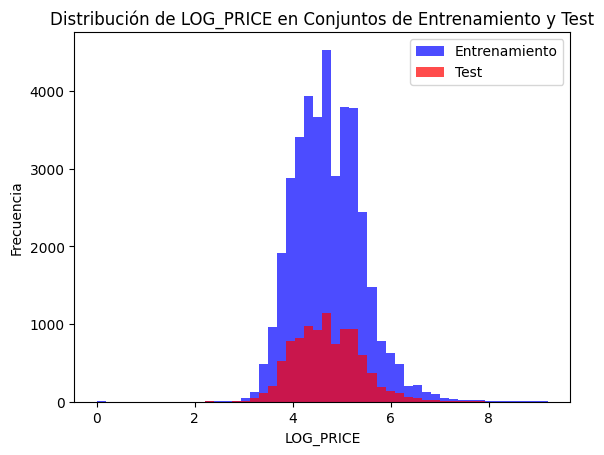

In [55]:
plt.hist(y_train, bins=50, alpha=0.7, label="Entrenamiento", color="blue")
plt.hist(y_test, bins=50, alpha=0.7, label="Test", color="red")
plt.legend()
plt.xlabel("LOG_PRICE")
plt.ylabel("Frecuencia")
plt.title("Distribución de LOG_PRICE en Conjuntos de Entrenamiento y Test")
plt.show()

## 4.(Para regresión) Observaciones influyentes en el conjunto de entrenamiento.

4.1 - Calcular Cook's Distance.
Este método nos ayuda a identificar observaciones que pueden estar afectando demasiado el modelo.

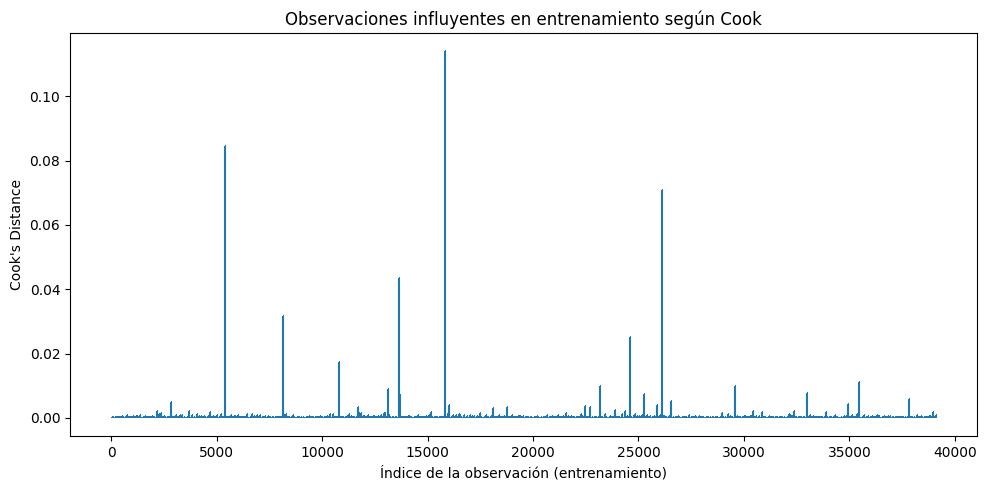

In [56]:
# Crear copia y añadir constante
X_train_const = sm.add_constant(X_train)

# Ajustar modelo OLS sobre los datos de entrenamiento
modelo_ols = sm.OLS(y_train, X_train_const).fit()

# Calcular distancia de Cook
influence = modelo_ols.get_influence()
cooks_d, _ = influence.cooks_distance

# Añadir la distancia al DataFrame de entrenamiento
X_train['cooks_d'] = cooks_d
X_train['y_train'] = y_train.values  # para referencia cruzada si quieres revisar outliers

# Visualizar
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.xlabel("Índice de la observación (entrenamiento)")
plt.ylabel("Cook's Distance")
plt.title("Observaciones influyentes en entrenamiento según Cook")
plt.tight_layout()
plt.show()


4.2 – Identificar y eliminar las observaciones más influyentes

In [57]:
# Definir umbral empírico
pto_corte = 4 / len(X_train)

# Extraer índices de viviendas influyentes
idx_viviendas_influyentes = np.where(cooks_d > pto_corte)[0]

# Crear nuevos conjuntos filtrados
X_train1 = X_train.drop(X_train.index[idx_viviendas_influyentes]).drop(columns=['cooks_d', 'y_train'])
y_train1 = y_train.drop(X_train.index[idx_viviendas_influyentes])

# Mostrar resumen
print(f"Viviendas eliminadas: {len(idx_viviendas_influyentes)}")
print(f"Tamaño original: {X_train.shape[0]}, Tamaño limpio: {X_train1.shape[0]}")

Viviendas eliminadas: 1575
Tamaño original: 39116, Tamaño limpio: 37541


In [58]:
# Obtener un array con los índices de viviendas influyentes
idx_viviendas_influyentes

array([   34,    68,   145, ..., 39080, 39083, 39108], shape=(1575,))

4.3 – Filtrar conjunto de test con coherencia respecto a entrenamiento

In [59]:
# Calcular rango intercuartílico (IQR) del set limpio
# Calcular límites de log_price en entrenamiento sin puntos influyentes
q1 = y_train1.quantile(0.25)
q3 = y_train1.quantile(0.75)
iqr = q3 - q1

limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

# Filtrar test
mask_test = (y_test >= limite_inf) & (y_test <= limite_sup)
X_test1 = X_test.loc[mask_test].copy()
y_test1 = y_test.loc[mask_test].copy()

# Verificar tamaños finales
print(f"Test original: {X_test.shape[0]} muestras")
print(f"Test filtrado: {X_test1.shape[0]} muestras")
print(f"Se eliminaron {X_test.shape[0] - X_test1.shape[0]} observaciones en test fuera del rango de entrenamiento")

Test original: 9779 muestras
Test filtrado: 9655 muestras
Se eliminaron 124 observaciones en test fuera del rango de entrenamiento


## 5.Extracción de características
A partir de las características originales obtener más datos, por ejemplo una columna que indique si era festivo/fin de semana en una daterminada fecha.

5.1 – Derivar nuevas variables a partir de columnas existentes

In [60]:
# Longitud del nombre del host
df['host_name_length'] = df['host_name'].fillna('').apply(len)

# ¿Está disponible todo el año?
df['available_all_year'] = (df['availability_365'] == 365).astype(int)

# Rango de nivel de actividad del host (más publicaciones = más activo)
df['is_superhost'] = (df['calculated_host_listings_count'] > 10).astype(int)

# Categorizar el número mínimo de noches (puede ayudar a diferenciar usos turísticos)
df['min_nights_group'] = pd.cut(df['minimum_nights'],
                                bins=[0, 2, 7, 30, 1000],
                                labels=['1-2', '3-7', '8-30', '30+'])

# Tiempo desde la última reseña hasta la actualidad (si se tiene columna 'last_review')
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['days_since_review'] = (pd.Timestamp('today') - df['last_review']).dt.days

5.2 – Codificar variables categóricas recién creadas (si aplica)

In [61]:
# Codificar min_nights_group si la agregaste
if 'min_nights_group' in df.columns:
    df['min_nights_group_encoded'] = LabelEncoder().fit_transform(df['min_nights_group'].astype(str))

5.3 – Reducir variables correlacionadas o redundantes

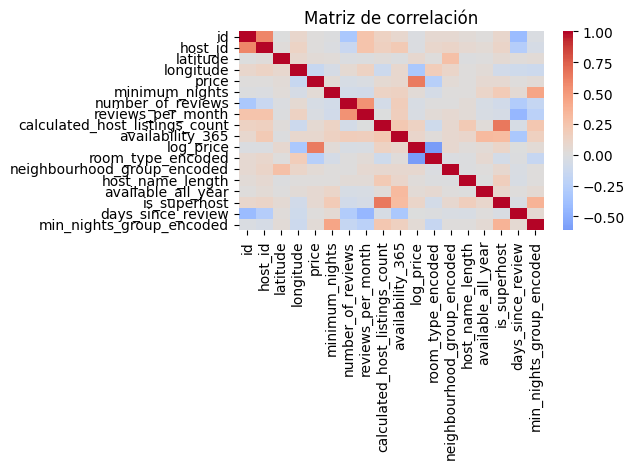

In [62]:
# Calcular matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Puedes visualizar o filtrar variables con correlaciones fuertes (> 0.8 o < -0.8)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

## 6.Selección de características
•	Usar feature_importance de un algoritmo basado en árboles como xgb. Podemos quedarnos con aquellas varaibles que presenten más de un 1% (primera criba).
•	El resto de variables no deben de estar correlacionadas (no queremos redundancia en los datos) por ello usamos el vif y las correlaciones.
•	VIF


6.1 – Evaluación de importancia de características con XGBoost

In [63]:
# Entrenar modelo XGBoost para estimar importancias
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train1, y_train1)

# Crear DataFrame con importancias
dict_data = {'Feature': X_train1.columns, 'Importancia': xgb_model.feature_importances_ * 100}
df_imp = pd.DataFrame(dict_data)

# Ordenar y filtrar por importancia >= 1%
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)
variables_seleccionadas = df_imp[df_imp['Importancia'] >= 1]['Feature'].tolist()

print("Variables seleccionadas por importancia (>=1%):", variables_seleccionadas)

Variables seleccionadas por importancia (>=1%): ['room_type_encoded', 'neighbourhood_group_encoded', 'minimum_nights']


6.2 – Filtrado del conjunto de datos con las variables más importantes

In [64]:
#Filtrar solo las características con importancia >= 1%
#features_seleccionadas = df_imp[df_imp['Importancia'] >= 1]['Feature'].tolist()

#Crear nuevo conjunto de datos con solo las características importantes
X_train1_filtrado = X_train1[variables_seleccionadas]
X_test1_filtrado = X_test1[variables_seleccionadas]  # Si tienes conjunto de prueba

print(f"Número de características eliminadas: {X_train1.shape[1] - X_train1_filtrado.shape[1]}")
print(f"Número de características finales: {X_train1_filtrado.shape[1]}")

Número de características eliminadas: 4
Número de características finales: 3


Este análisis responde a la primera criba: conservar las variables que más aportan al modelo según un estimador robusto basado en árboles.

6.3 – Reducción de redundancia: Correlación y VIF

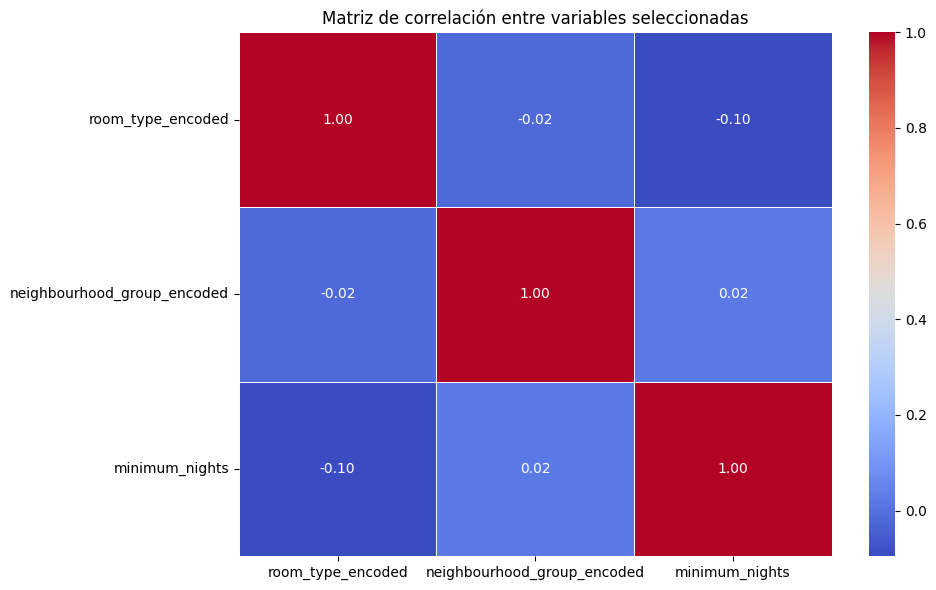

VIF final tras eliminación:
room_type_encoded              1.620219
neighbourhood_group_encoded    1.837471
minimum_nights                 1.200981
dtype: float64


In [65]:
# Usamos las variables seleccionadas en el paso 6.1
X_reducido = X_train1_filtrado.copy()

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(X_reducido.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables seleccionadas")
plt.tight_layout()
plt.show()

# Cálculo de VIF con función auxiliar
def calcular_vif(df):
    return pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)

# Eliminación iterativa de variables con VIF > 5
X_train_final = X_train1_filtrado.copy()
X_test_final = X_test1_filtrado.copy()

while calcular_vif(X_train_final).max() > 5:
    var_a_eliminar = calcular_vif(X_train_final).idxmax()
    print(f"Eliminando variable con VIF alto: {var_a_eliminar}")
    X_train_final.drop(columns=[var_a_eliminar], inplace=True)
    X_test_final.drop(columns=[var_a_eliminar], inplace=True)

# Mostrar VIF final
print("VIF final tras eliminación:")
print(calcular_vif(X_train_final))

6.4 – Correlación de las variables predictoras con la variable objetivo

<Axes: >

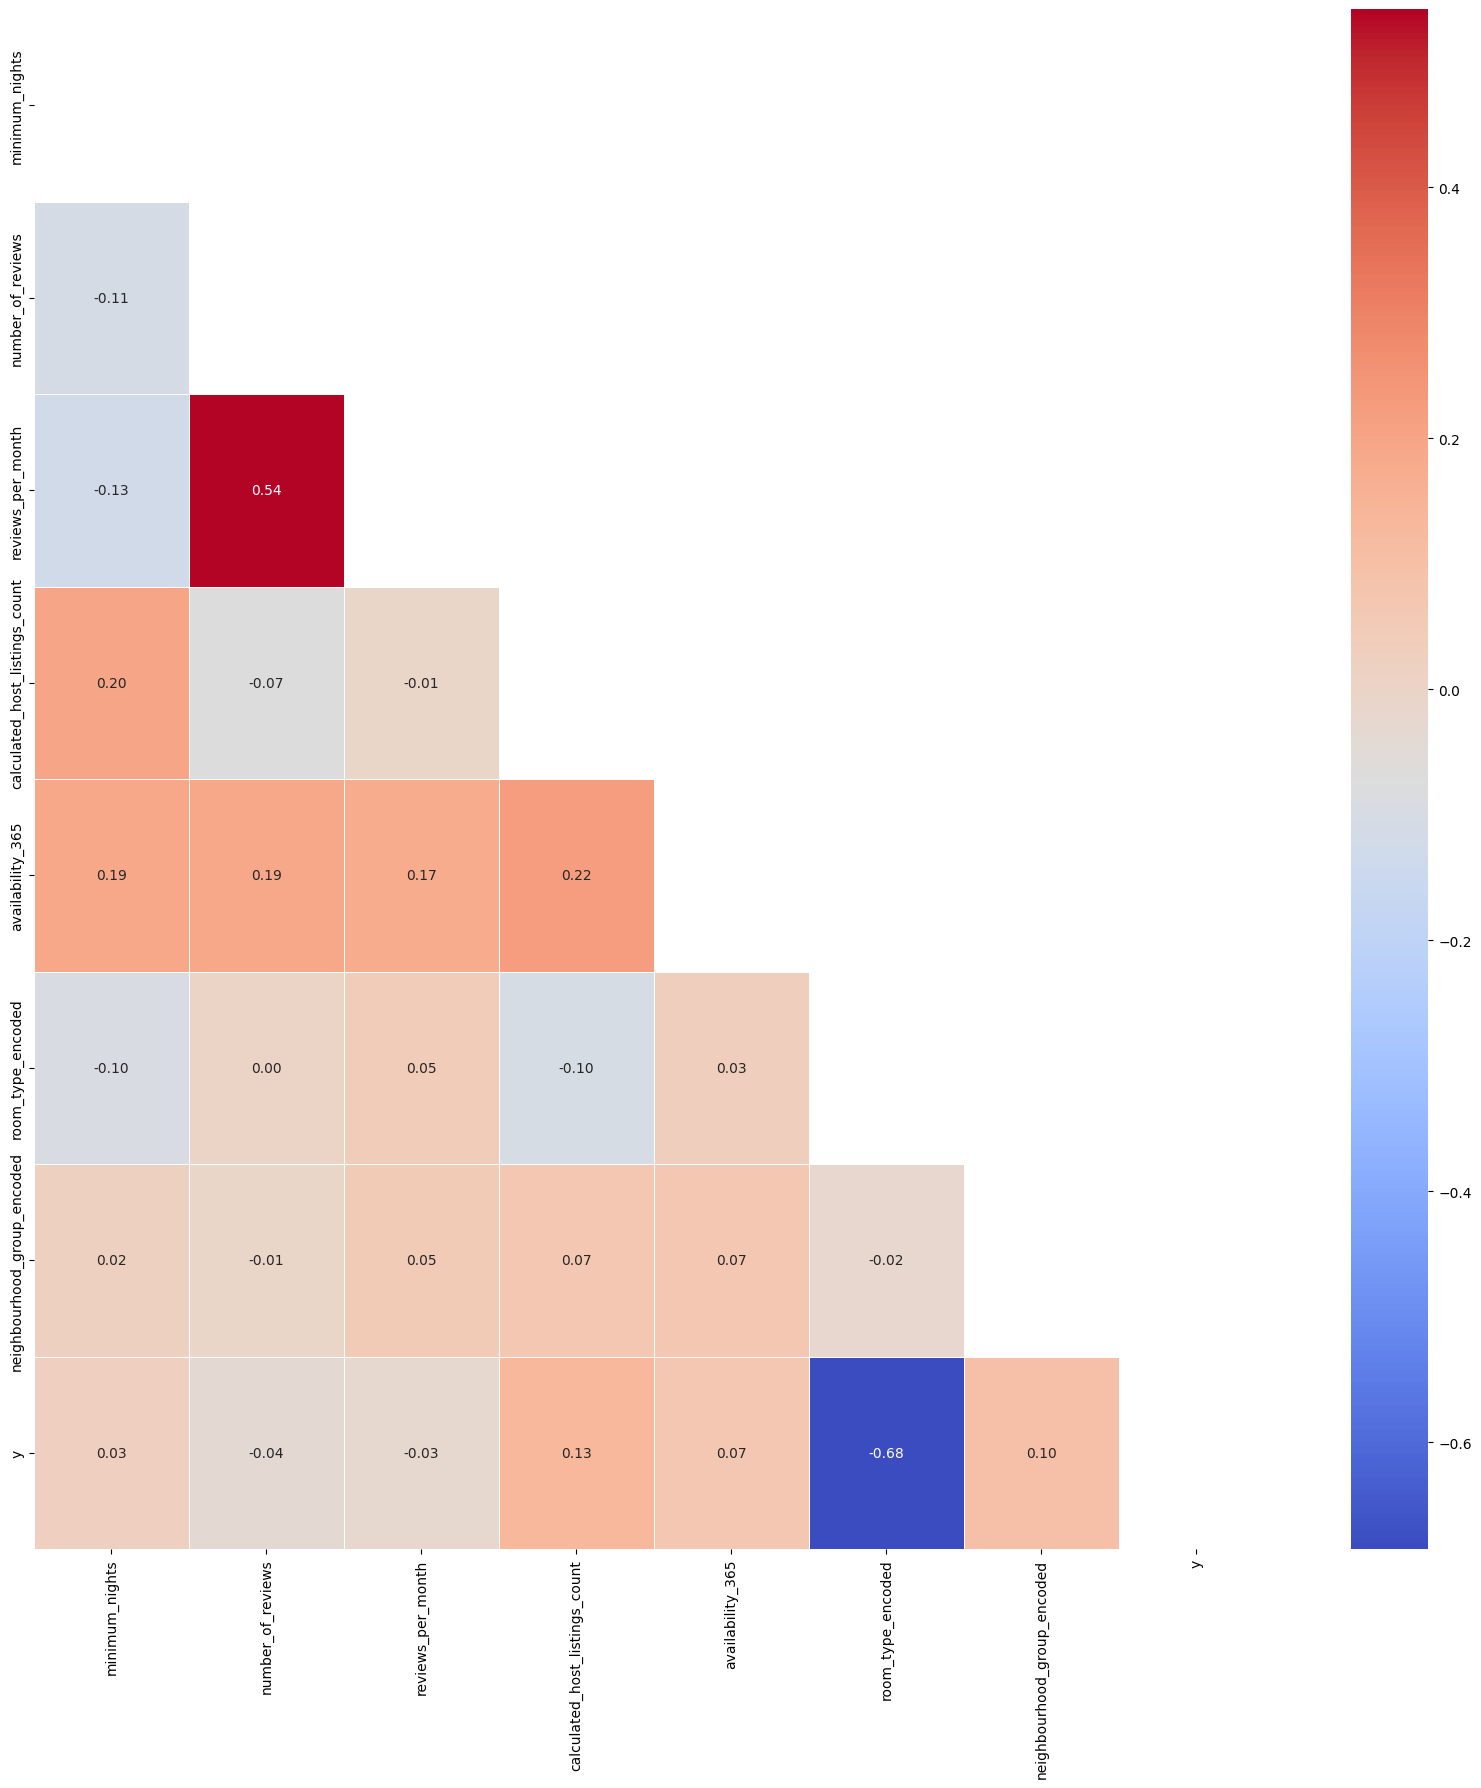

In [66]:
X_corr = X_train1.copy() #Copiamos X_train1 en X_corr. Así evitamos modificar el dataset original
X_corr['y'] = y_train1
corr = X_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


## 7.Escalado de las características
Existen múltiples técnicas de escalado, por ejemplo:
•	MinxmaxScaler (0-1): Se conoce como normalizar y sería inidicado cuando creemos cononer los valores mínimos y máximos de las características.
•	standardScaler (media 0 std 1): Se conoce como estandarizar y sería inidicado cuando creemos que nustras variables siguen una distibución normal.


7.1 – Aplicación de StandardScaler (escalado estándar)

In [67]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar el escalador al conjunto de entrenamiento filtrado y transformarlo
X_train_scaled = scaler.fit_transform(X_train1_filtrado)

# Aplicar el mismo escalado al conjunto de test
X_test_scaled = scaler.transform(X_test1_filtrado)

# Verificar dimensiones
print(f"X_train escalado: {X_train_scaled.shape}")
print(f"X_test escalado: {X_test_scaled.shape}")

X_train escalado: (37541, 3)
X_test escalado: (9655, 3)
